In [98]:
# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing,
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum,
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [100]:
istirahat = 7 # istirahat yang cukup

In [101]:
# range waktu harian (sisanya selain istirahat)
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
active_max = 24 - istirahat  # = 17 jam aktif
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)
# sisa waktu untuk organisasi/makan/nugas (R)
R = active_max - (X + Y)   # bisa negatif bila X+Y > active_max

In [102]:
# Preferensi utama (Gaussian)
kuliah_pref = np.exp(-((x - 6.0)**2) / (2*2))   # target kuliah 6 jam
main_pref   = np.exp(-((x - 4.0)**2) / (2*2))   # target main 4 jam
org_pref    = np.exp(-((x - 2.0)**2) / (2*2))   # target organisasi 2 jam
makan_pref  = np.exp(-((x - 1.0)**2) / (2*2))   # target makan 1 jam
tugas_pref  = np.exp(-((x - 4.0)**2) / (2*2))   # target nugas 4 jam

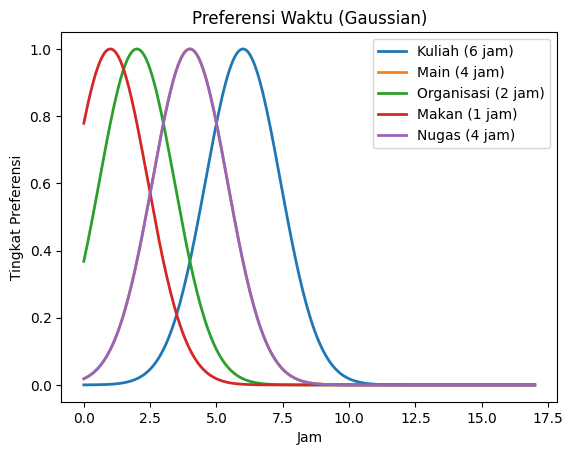

In [103]:
plt.plot(x, kuliah_pref, label="Kuliah (6 jam)", linewidth=2)
plt.plot(x, main_pref,   label="Main (4 jam)", linewidth=2)
plt.plot(x, org_pref,    label="Organisasi (2 jam)", linewidth=2)
plt.plot(x, makan_pref,  label="Makan (1 jam)", linewidth=2)
plt.plot(x, tugas_pref,  label="Nugas (4 jam)", linewidth=2)

plt.legend()
plt.title("Preferensi Waktu (Gaussian)")
plt.xlabel("Jam")
plt.ylabel("Tingkat Preferensi")
plt.show()

In [104]:
# Penalti kalau total melebihi jam tersedia (17 jam aktif)
total_waktu = X + Y
# total_penalty = 0.5 * np.maximum(total_waktu - (24-istirahat), 0)
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
# plt.plot(x, -total_penalty)

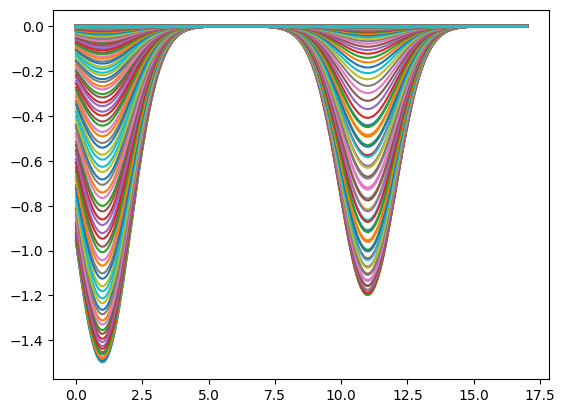

In [105]:
# Kebanyakan Main
A_terlena = 1.2
terlena = A_terlena * np.exp(-(((X - 1.5)**2) + ((Y - 11.0)**2)) / (1.5**2))
# artinya: sangat sedikit kuliah (~1.5 jam) + sangat banyak main (~11 jam) -> besar penalty
plt.plot(x, -terlena)

A_burnout = 1.5
burnout = A_burnout * np.exp(-(((X - 12.0)**2) + ((Y - 1.0)**2)) / (1.5**2))
# artinya: sangat banyak kuliah (~12 jam) + sangat sedikit main -> burnout
plt.plot(x, -burnout)

# tambahan penalti kalau R negatif (tidak ada waktu untuk org/makan/tugas)
R_penalty = 5.0 * np.maximum(-R, 0.0)


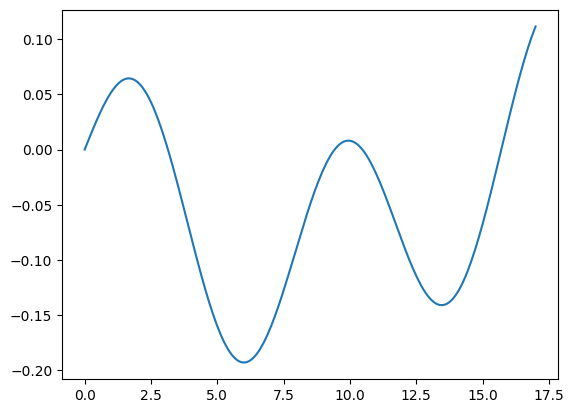

In [106]:
# Naik-turun motivasi harian (noise + ripple)
NPM = 10
np.random.seed(NPM)
plt.plot(x, 0.2 * np.sin(0.3*x) * np.cos(0.5*y))
ripple = 0.2 * np.sin(0.3*X) * np.cos(0.5*Y)
noise = np.random.normal(0, 0.05, size=X.shape)
ripple += noise

In [107]:
# Objective Function
Z = 10 * (0.4 * kuliah_pref + 0.2 * main_pref + 0.1 * org_pref + 0.1 * makan_pref + 0.2 * tugas_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

In [108]:
# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

In [109]:
# clip nilai
Z_clip = np.clip(Z, -5, 20)

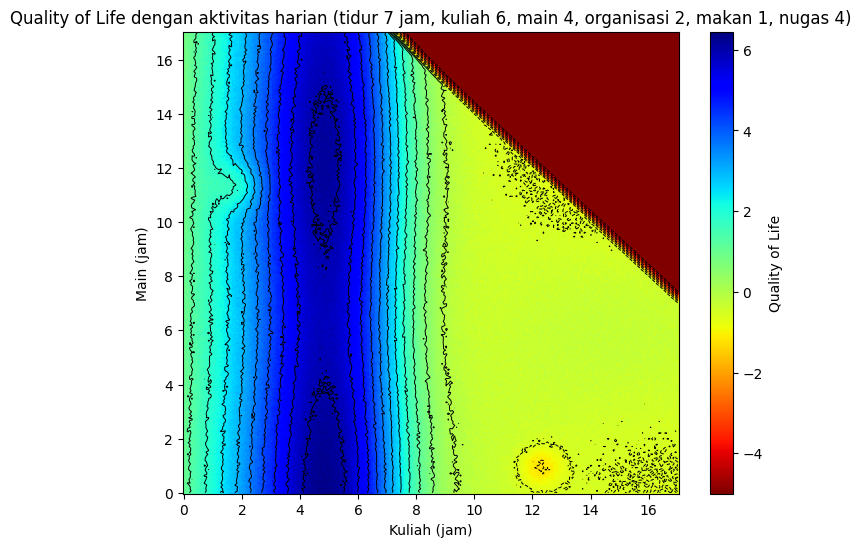

In [110]:
# Plot
plt.figure(figsize=(8,6))
c = plt.pcolormesh(X, Y, Z_clip, cmap="jet_r", shading="auto")
contours = plt.contour(X, Y, Z_clip, levels=20, colors="black", linewidths=0.7)
plt.colorbar(c, label="Quality of Life")
plt.xlabel("Kuliah (jam)")
plt.ylabel("Main (jam)")
plt.title("Quality of Life dengan aktivitas harian (tidur 7 jam, kuliah 6, main 4, organisasi 2, makan 1, nugas 4)")
plt.show()

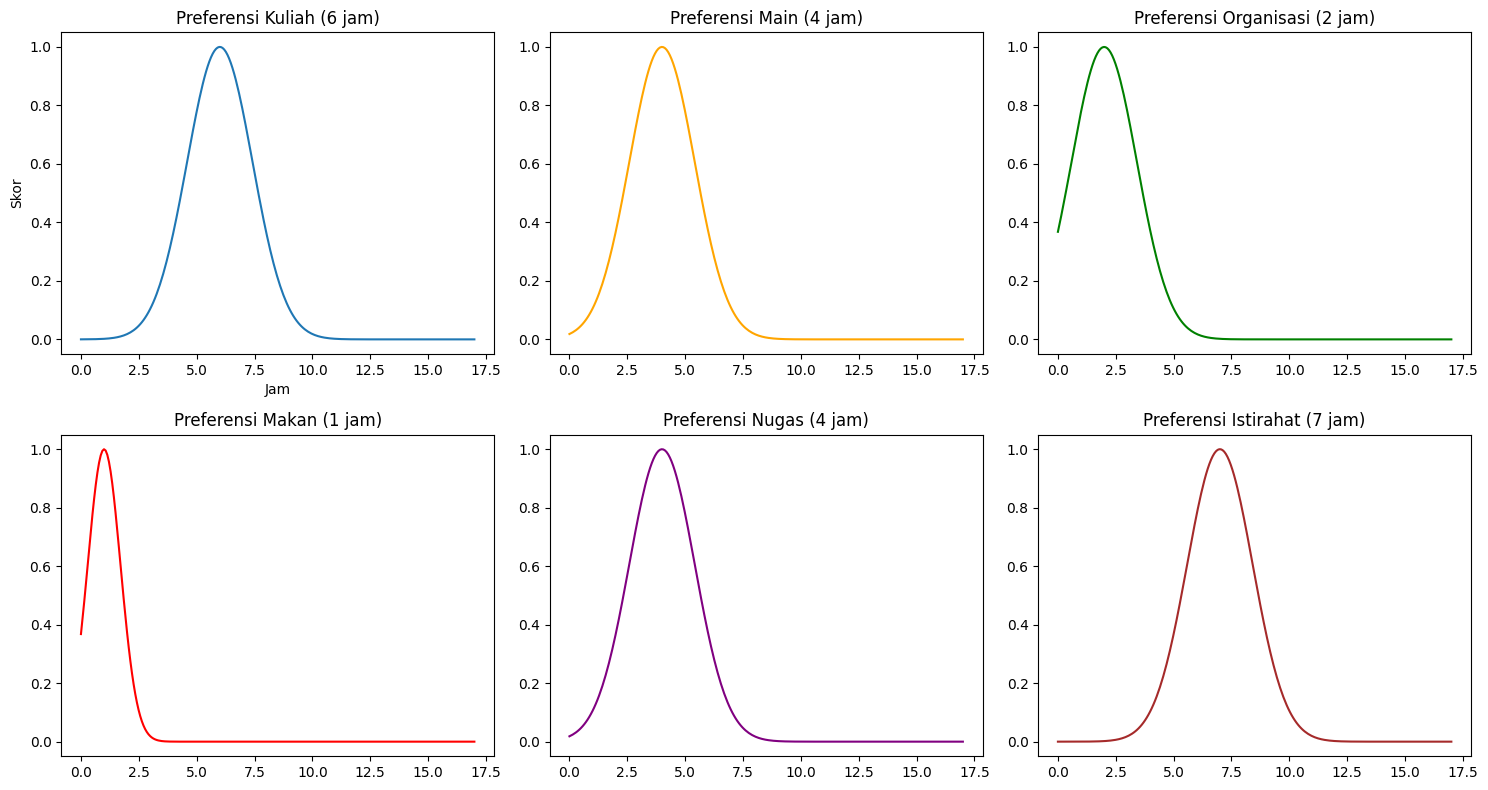

In [111]:
# TUGAS 1a: Plot grafik-grafik preferensi secara berdampingan
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Kuliah
axes[0,0].plot(x, np.exp(-((x - 6.0)**2) / (2**2)))
axes[0,0].set_title("Preferensi Kuliah (6 jam)")
axes[0,0].set_xlabel("Jam")
axes[0,0].set_ylabel("Skor")

# Main
axes[0,1].plot(x, np.exp(-((x - 4.0)**2) / (2**2)), color="orange")
axes[0,1].set_title("Preferensi Main (4 jam)")

# Organisasi
axes[0,2].plot(x, np.exp(-((x - 2.0)**2) / (2**2)), color="green")
axes[0,2].set_title("Preferensi Organisasi (2 jam)")

# Makan
axes[1,0].plot(x, np.exp(-((x - 1.0)**2) / (1**2)), color="red")
axes[1,0].set_title("Preferensi Makan (1 jam)")

# Nugas
axes[1,1].plot(x, np.exp(-((x - 4.0)**2) / (2**2)), color="purple")
axes[1,1].set_title("Preferensi Nugas (4 jam)")

# Istirahat
axes[1,2].plot(x, np.exp(-((x - 7.0)**2) / (2**2)), color="brown")
axes[1,2].set_title("Preferensi Istirahat (7 jam)")

plt.tight_layout()
plt.show()

In [113]:
import numpy as np

# Target aktivitas harian (jam)
target = {
    "kuliah": 6,
    "main": 4,
    "org": 2,
    "makan": 1,
    "tugas": 4,
    "istirahat": 7
}

# Fungsi Quality of Life dengan constraint total 24 jam
def quality_of_life(k, m, o, mk, t, i):
    total = k + m + o + mk + t + i
    if total != 24:
        return -999   # hanya terima jadwal pas 24 jam

    # preferensi (Gaussian sekitar target)
    pref_k = np.exp(-((k - target["kuliah"])**2) / (2**2))
    pref_m = np.exp(-((m - target["main"])**2) / (2**2))
    pref_o = np.exp(-((o - target["org"])**2) / (1.5**2))
    pref_mk = np.exp(-((mk - target["makan"])**2) / (1**2))
    pref_t = np.exp(-((t - target["tugas"])**2) / (2**2))
    pref_i = np.exp(-((i - target["istirahat"])**2) / (2**2))

    # bobot relatif (jumlah = 1)
    score = (0.25*pref_k + 0.2*pref_m + 0.15*pref_o +
             0.1*pref_mk + 0.15*pref_t + 0.15*pref_i) * 10

    # penalty burnout: terlalu banyak kuliah + nugas
    burnout = 4.0 * np.exp(-(((k-10)**2) + ((t-6)**2)) / (3**2))
    score -= burnout

    # penalty terlena: terlalu banyak main
    terlena = 3.0 * np.exp(-((m-9)**2) / (3**2))
    score -= terlena

    # penalty kurang istirahat
    kurang_tidur = 5.0 * np.exp(-((i-5)**2) / (2**2))
    score -= kurang_tidur

    # noise kecil (biar gak simetris banget)
    rng = np.random.default_rng(42)
    score += rng.normal(0, 0.2)

    return score

# Cari optimum manual (brute force)
best_score = -999
best_sched = None

for k in range(0, 13):
    for m in range(0, 13):
        for o in range(0, 5):
            for mk in range(0, 4):
                for t in range(0, 9):
                    for i in range(5, 10):
                        score = quality_of_life(k, m, o, mk, t, i)
                        if score > best_score:
                            best_score = score
                            best_sched = (k, m, o, mk, t, i)

print("Titik optimum global (semua faktor, total jam = 24):")
print(f" Kuliah    = {best_sched[0]} jam")
print(f" Main      = {best_sched[1]} jam")
print(f" Organisasi= {best_sched[2]} jam")
print(f" Makan     = {best_sched[3]} jam")
print(f" Nugas     = {best_sched[4]} jam")
print(f" Istirahat = {best_sched[5]} jam")
print(f" Skor QoL  = {best_score:.2f}")


Titik optimum global (semua faktor, total jam = 24):
 Kuliah    = 6 jam
 Main      = 4 jam
 Organisasi= 2 jam
 Makan     = 1 jam
 Nugas     = 3 jam
 Istirahat = 8 jam
 Skor QoL  = 8.44


## Tugas 4
Saya biasanya bangun jam 7 pagi setelah tidur selama 7 jam. Setelah bangun, saya langsung sarapan sebentar sebelum memulai kuliah.

Mulai dari jam 8 pagi sampai sore, saya mengikuti kuliah. Total kuliah biasanya 6 jam. Sekitar jam 1 siang, di sela-sela kuliah atau setelah kelas selesai, saya menyempatkan makan siang. Walaupun waktunya singkat, itu cukup untuk mengisi energi agar tetap fokus belajar.

Setelah kuliah, saya gunakan waktu untuk mengerjakan tugas dan belajar mandiri. Total ada 4 jam yang saya dedikasikan untuk aktivitas ini.

Saya juga menyisihkan waktu hiburan atau main selama 4 jam, biasanya saya isi dengan nonton, main game, dan istirahat sambil buka media sosial.

Pada jam 7 malam, saya mulai aktivitas organisasi selama 2 jam. Biasanya berupa rapat atau meeting. Aktivitas ini penting bagi saya untuk melatih soft skill.

Setelah kegiatan organisasi selesai, saya makan malam, lalu bisa melanjutkan sedikit hiburan ringan atau persiapan untuk keesokan harinya.

Akhirnya, sekitar jam 12 malam, saya tidur lagi untuk menjaga istirahat tetap 7 jam.